In [1]:
import pandas as pd
import numpy as np

In [2]:
dir_path = './CMaps/'
index_names = ['unit_nr', 'time_cycles']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = ['T2', 'T24', 'T30', 'T50', 'P2', 'P15', 'P30', 'Nf', 'Nc', 'epr', 'Ps30', 'phi', 'NRf', 'NRc', 'BPR', 'farB', 'htBleed', 'Nf_dmd', 'PCNfr_dmd', 'W31', 'W32'] 
col_names = index_names + setting_names + sensor_names

In [3]:
def open_df(number):
    train = pd.read_csv((dir_path+'train_FD00' + str(number) + '.txt'), sep='\s+', header=None, names=col_names)
    test = pd.read_csv((dir_path+'test_FD00' + str(number) + '.txt'), sep='\s+', header=None, names=col_names)
    y_test = pd.read_csv((dir_path+'RUL_FD00' + str(number) + '.txt'), sep='\s+', header=None, names=['RUL'])
    return train, test, y_test

In [4]:
train, test, y_test = open_df(1)

In [5]:
train.head()

,unit_nr,time_cycles,setting_1,setting_2,setting_3,T2,T24,T30,T50,P2,...,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfr_dmd,W31,W32
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [6]:
test.head()

,unit_nr,time_cycles,setting_1,setting_2,setting_3,T2,T24,T30,T50,P2,...,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfr_dmd,W31,W32
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


In [7]:
y_test.head()

,RUL
0,112
1,98
2,69
3,82
4,91


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import random

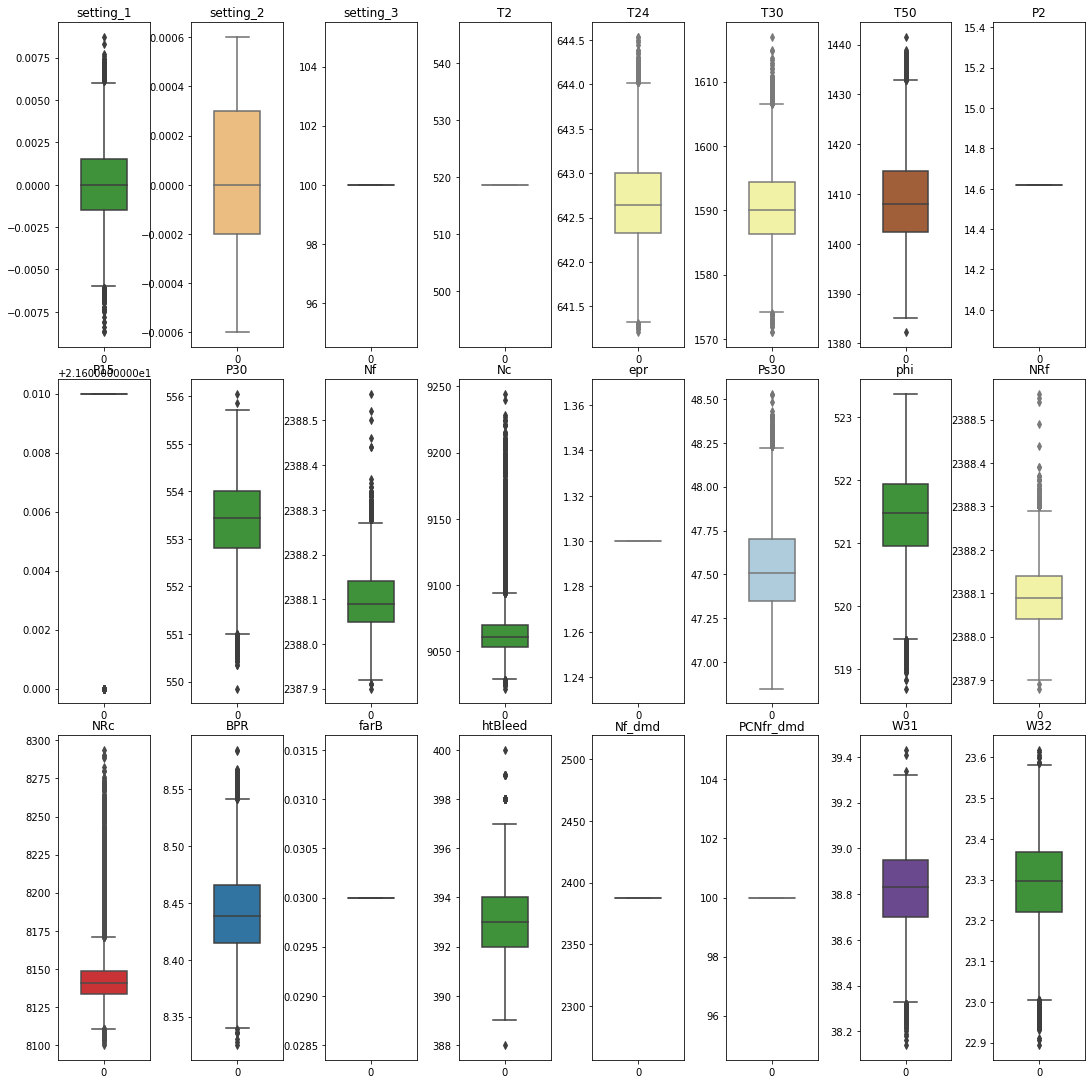

In [9]:
fig, axes = plt.subplots(int(len(train.columns[2:])/8), 8, figsize=(15, 15))
fig.tight_layout()
i, j = 0, 0 
for feature in train.columns[2:]:
    sns.boxplot(ax=axes[i, j], data=train[feature], width=0.5, color=random.choice(sns.color_palette("Paired"))).set(title=feature)
    j = j + 1
    if j == 8:
        j = 0
        i = i + 1

In [10]:
drop_labels = ['setting_3', 'T2', 'P2', 'epr', 'farB', 'Nf_dmd', 'PCNfr_dmd']
train = train.drop(drop_labels, axis=1)

In [11]:
def add_remaining_useful_life(df):
    # Get the total number of cycles for each unit
    grouped_by_unit = df.groupby(by="unit_nr")
    max_cycle = grouped_by_unit["time_cycles"].max()
    
    # Merge the max cycle back into the original frame
    result_frame = df.merge(max_cycle.to_frame(name='max_cycle'), left_on='unit_nr', right_index=True)
    
    # Calculate remaining useful life for each row
    remaining_useful_life = result_frame["max_cycle"] - result_frame["time_cycles"]
    result_frame["RUL"] = remaining_useful_life
    
    # drop max_cycle as it's no longer needed
    result_frame = result_frame.drop("max_cycle", axis=1)
    return result_frame

In [12]:
train = add_remaining_useful_life(train)

In [13]:
train[train['unit_nr'] == 1]

,unit_nr,time_cycles,setting_1,setting_2,T24,T30,T50,P15,P30,Nf,Nc,Ps30,phi,NRf,NRc,BPR,htBleed,W31,W32,RUL
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,1,188,-0.0067,0.0003,643.75,1602.38,1422.78,21.61,551.94,2388.31,9037.91,48.00,519.79,2388.23,8117.69,8.5207,396,38.51,22.9588,4
188,1,189,-0.0006,0.0002,644.18,1596.17,1428.01,21.61,550.70,2388.27,9044.55,48.08,519.58,2388.33,8117.51,8.5183,395,38.48,23.1127,3
189,1,190,-0.0027,0.0001,643.64,1599.22,1425.95,21.61,551.29,2388.29,9040.58,48.33,520.04,2388.35,8112.58,8.5223,398,38.49,23.0675,2
190,1,191,-0.0000,-0.0004,643.34,1602.36,1425.77,21.61,550.92,2388.28,9042.76,48.15,519.57,2388.30,8114.61,8.5174,394,38.45,23.1295,1


In [14]:
drop_labels = index_names + drop_labels

In [15]:
X_train = train.drop(index_names, axis=1)
y_train = X_train.pop('RUL')
X_test = test.groupby('unit_nr').last().reset_index().drop(drop_labels, axis=1)

In [16]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [17]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import PoissonRegressor
from sklearn.linear_model import SGDRegressor

In [19]:
def fit_predict(X_train, X_test, y_train, y_test, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mse(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    return rmse, r2

In [20]:
def scaling(scaler):
    scaled_X_train=scaler.fit_transform(X_train)
    scaled_X_test=scaler.transform(X_test)
    return scaled_X_train, scaled_X_test

In [21]:
lr = LinearRegression()
rmse, r2 = fit_predict(X_train, X_test, y_train, y_test, lr)
print('RMSE:', rmse, 'R2-Score:', r2)

RMSE: 32.04109478173165 R2-Score: 0.4054954961208932


In [22]:
res = []
for i in range(115, 131):
    y_train_clipped = y_train.clip(upper=i)
    rmse, r2 = fit_predict(X_train, X_test, y_train_clipped, y_test, lr)
    res.append(rmse)

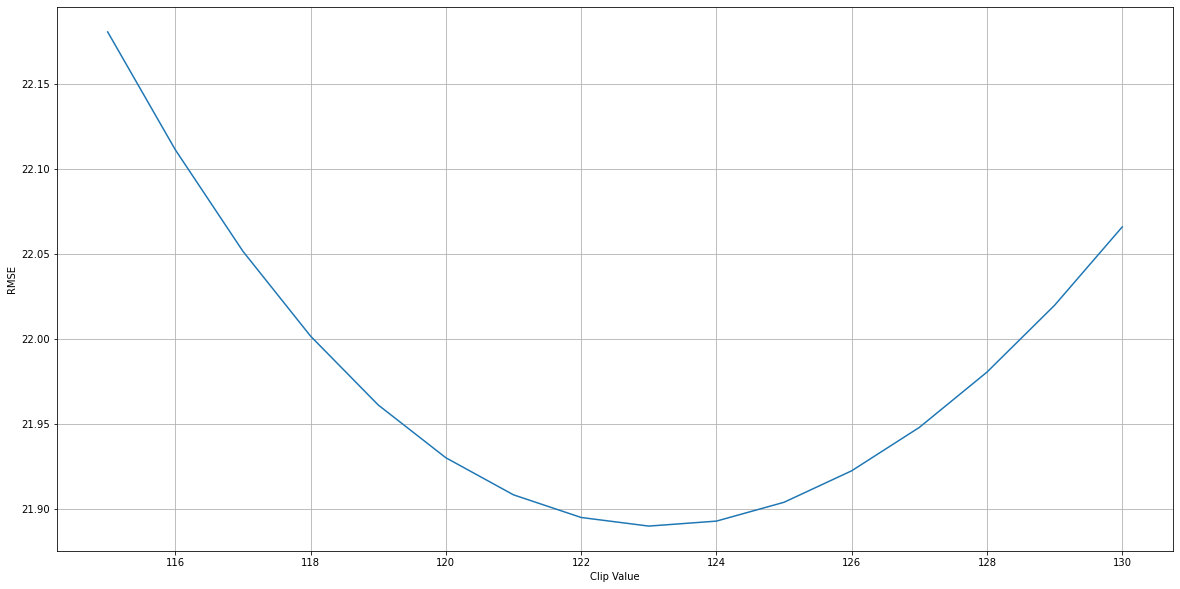

In [23]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(range(115, 131), res)
ax.set(xlabel='Clip Value', ylabel='RMSE')
ax.grid()
plt.show()

In [24]:
y_train_clipped = y_train.clip(upper=123)

In [25]:
models = [LinearRegression(), SVR(kernel='linear'), RandomForestRegressor(random_state=1), DecisionTreeRegressor(random_state=1), 
          KNeighborsRegressor(), AdaBoostRegressor(random_state=1), GradientBoostingRegressor(random_state=1), 
          Lasso(random_state=1), BayesianRidge(), PoissonRegressor(), SGDRegressor(random_state=1)]

In [26]:
scalers = [MinMaxScaler(), MaxAbsScaler(), StandardScaler(), RobustScaler(), Normalizer(), QuantileTransformer()]

In [27]:
Model = []
Scaler = []
RMSE = []
Score = []
for model in models:
    for scale in scalers:
        scaled_X_train, scaled_X_test = scaling(scale)
        rmse, r2 = fit_predict(scaled_X_train, scaled_X_test, y_train_clipped, y_test, model)
        Model.append(type(model).__name__)
        Scaler.append(type(scale).__name__)
        RMSE.append(rmse)
        Score.append(r2)

C:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [28]:
d = {'Model': Model, 'Scaler': Scaler, 'RMSE': RMSE, 'R2-Score': Score}

In [29]:
results = pd.DataFrame(data=d)

In [30]:
results

,Model,Scaler,RMSE,R2-Score
0,LinearRegression,MinMaxScaler,21.890167,0.722516
1,LinearRegression,MaxAbsScaler,21.890167,0.722516
2,LinearRegression,StandardScaler,21.890167,0.722516
3,LinearRegression,RobustScaler,21.890167,0.722516
4,LinearRegression,Normalizer,21.743687,0.726217
...,...,...,...,...
61,SGDRegressor,MaxAbsScaler,34.637616,0.305237
62,SGDRegressor,StandardScaler,22.091059,0.717399
63,SGDRegressor,RobustScaler,22.122384,0.716597
64,SGDRegressor,Normalizer,43.228108,-0.082114


In [31]:
results.sort_values(by="RMSE").head()

,Model,Scaler,RMSE,R2-Score
14,RandomForestRegressor,StandardScaler,18.446522,0.802953
13,RandomForestRegressor,MaxAbsScaler,18.463985,0.802580
17,RandomForestRegressor,QuantileTransformer,18.472566,0.802396
12,RandomForestRegressor,MinMaxScaler,18.476719,0.802308
15,RandomForestRegressor,RobustScaler,18.478318,0.802273


In [32]:
scaled_X_train, scaled_X_test = scaling(StandardScaler())

In [33]:
rmses = []
max_depth = [10, 20, 50, 75, 100, None]
for i in max_depth:
    rfr = RandomForestRegressor(random_state=1, max_depth=i)
    rmse, r2 = fit_predict(scaled_X_train, scaled_X_test, y_train_clipped, y_test, rfr)
    rmses.append(rmse)

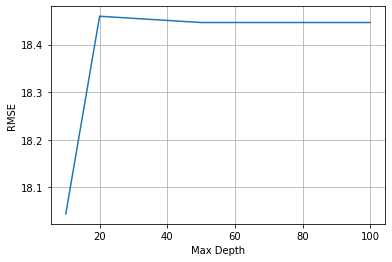

In [34]:
fig, ax = plt.subplots()
ax.plot(max_depth, rmses)
ax.set(xlabel='Max Depth', ylabel='RMSE')
ax.grid()
plt.show()

In [35]:
rmses = []
max_features = [2, 3, 5, 10, 15, None]
for i in max_features:
    rfr = RandomForestRegressor(random_state=1, max_features=i)
    rmse, r2 = fit_predict(scaled_X_train, scaled_X_test, y_train_clipped, y_test, rfr)
    rmses.append(rmse)

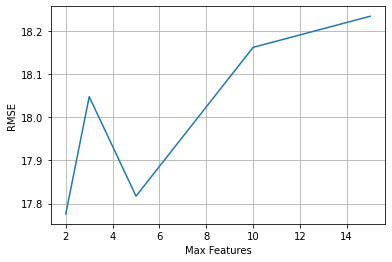

In [36]:
fig, ax = plt.subplots()
ax.plot(max_features, rmses)
ax.set(xlabel='Max Features', ylabel='RMSE')
ax.grid()
plt.show()

In [37]:
rmses = []
min_samples_leaf = [1, 2, 3, 5, 10, 15]
for i in min_samples_leaf:
    rfr = RandomForestRegressor(random_state=1, min_samples_leaf=i)
    rmse, r2 = fit_predict(scaled_X_train, scaled_X_test, y_train_clipped, y_test, rfr)
    rmses.append(rmse)

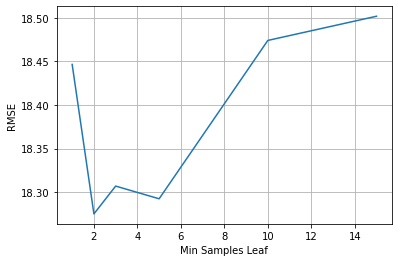

In [38]:
fig, ax = plt.subplots()
ax.plot(min_samples_leaf, rmses)
ax.set(xlabel='Min Samples Leaf', ylabel='RMSE')
ax.grid()
plt.show()

In [39]:
rmses = []
min_samples_split = [2, 3, 5, 10, 15]
for i in min_samples_split:
    rfr = RandomForestRegressor(random_state=1, min_samples_split=i)
    rmse, r2 = fit_predict(scaled_X_train, scaled_X_test, y_train_clipped, y_test, rfr)
    rmses.append(rmse)

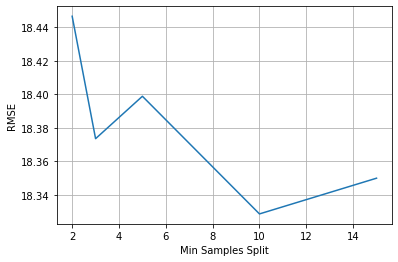

In [40]:
fig, ax = plt.subplots()
ax.plot(min_samples_split, rmses)
ax.set(xlabel='Min Samples Split', ylabel='RMSE')
ax.grid()
plt.show()

In [41]:
rmses = []
n_estimators = [100, 200, 300, 400, 500]
for i in n_estimators:
    rfr = RandomForestRegressor(random_state=1, n_estimators=i)
    rmse, r2 = fit_predict(scaled_X_train, scaled_X_test, y_train_clipped, y_test, rfr)
    rmses.append(rmse)

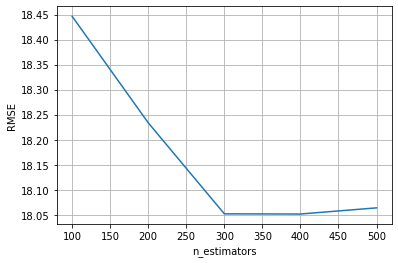

In [42]:
fig, ax = plt.subplots()
ax.plot(n_estimators, rmses)
ax.set(xlabel='n_estimators', ylabel='RMSE')
ax.grid()
plt.show()

In [43]:
rfr = RandomForestRegressor(random_state=1, max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=300)
rmse, r2 = fit_predict(scaled_X_train, scaled_X_test, y_train_clipped, y_test, rfr)
print('RMSE:', rmse, 'R2-Score:', r2)

RMSE: 17.877765549764796 R2-Score: 0.8149168292427194


In [44]:
from sklearn.model_selection import RandomizedSearchCV

In [45]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [10, 20, 50, 75, 100, None],
    'max_features': [2, 3, 5, 10, 15, None],
    'min_samples_leaf': [1, 2, 3, 5, 10, 15],
    'min_samples_split': [2, 3, 5, 10, 15],
    'n_estimators': [100, 200, 300, 400, 500]
}

In [46]:
rf_random = RandomizedSearchCV(estimator = rfr, param_distributions = param_grid, n_iter = 100, cv = 3, verbose=2, random_state=1, n_jobs = -1)

In [47]:
rf_random.fit(scaled_X_train, y_train_clipped)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(max_depth=10, max_features=2,
                                                   min_samples_leaf=2,
                                                   min_samples_split=10,
                                                   n_estimators=300,
                                                   random_state=1),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [10, 20, 50, 75, 100,
                                                      None],
                                        'max_features': [2, 3, 5, 10, 15, None],
                                        'min_samples_leaf': [1, 2, 3, 5, 10,
                                                             15],
                                        'min_samples_split': [2, 3, 5, 10, 15],
                                        'n_estimators': [100, 200, 300

In [48]:
rf_random.best_params_

{'n_estimators': 300,
 'min_samples_split': 3,
 'min_samples_leaf': 3,
 'max_features': 3,
 'max_depth': 50,
 'bootstrap': True}

In [49]:
rfr = RandomForestRegressor(random_state=1, max_depth=50, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=300)
rmse, r2 = fit_predict(scaled_X_train, scaled_X_test, y_train_clipped, y_test, rfr)
print('RMSE:', rmse, 'R2-Score:', r2)

RMSE: 17.777161358718384 R2-Score: 0.8169940185559407
